## 1. Zahlenkonvertierung

Schreiben Sie ein Python-Programm, welches vom Nutzer eine Binärzahl einliest und diese in die entsprechende Dezimalzahl konvertiert.

- Für die Nutzereingabe gibt es die Funktion `input()`, welche einen String zurückliefert.
- Der allerkürzestes Weg wäre ein Typecast von String zu Integer bezüglich der Basis 2, z.B. `int("10110", base=2)` ergibt 22. Hier sollen Sie **nicht** (oder nur zum Debuggen) darauf zurückgreifen, sonders die Umrechnung selbst implementieren.

In [51]:
binary = input("Zahl eingeben:")

#decimal = 0
#for i in range(len(binary)):
#    decimal += int(binary[i])*(2**(len(binary) - 1 -i))
#decimal

#decimal = 0
#binary_rev = list(reversed(binary))
#for i, char in enumerate(binary_rev):
#    decimal += int(char) * 2**i
#decimal

decimal = 0
index = 0
digits = list(binary)
while digits:
    if digits.pop() == "1":
        decimal += 2**index
    index += 1
decimal

25

## 2. Worthäufigkeiten

Lesen Sie die Datei **faust.txt** ein und zählen Sie die Häufigkeit der einzelnen Worte. Welches sind die häufigsten/seltensten Worte? 

Wenn die Programmlogik erstmal steht, können Sie folgende Optimierungen vornehmen:
- Aufgrund von Satzanfängen kann es sinnvoll sein, die Worte alle zu Uppercase oder Lowercase zu konvertieren. Strings kennen z.B. die Methoden `upper()` und `lower()`. (`"Ein Text".upper()` -> `"EIN TEXT"`)
- Es kann sinnvoll sein, Satzzeichen zu entfernen. Am mächtigsten sind hierfür reguläre Ausdrücke (regular expressions). Diese kann man mittels `import re` zur Verfügung stellen. Die Funktion `sub(pattern, replacement, text)` ersetzt im `text` alle Treffer des angegebenen `pattern` durch das `replacement`. Beispiel: `re.sub("[,:]", "", "Beispiel: eins, zwei, drei")` -> `"Beispiel eins zwei drei"` 

Im Weiteren wollen wir untersuchen, wie viele Worte genau einen, zwei, drei, ... Buchstaben lang sind.
Was ist die häufigste Wortlänge? Wie lang ist das längste Wort? 
Visualisieren Sie Ihre Resultate in einem Balkendiagramm/Histogramm.

In [92]:
import re

# Datei öffnen und alle Zeilen auslesen
with open("Goethe - Faust I.txt", encoding="UTF-8") as file:
    lines = file.readlines()


counter = {}
for line in lines:
    # alles zu Lowercase machen Sonderzeichen entfernen
    line = line.lower()
    line = re.sub(r"[,:\.\!\?'\-\—\(\)]", "", line)

    # über Einzelworte iterieren und wortweise Einzelcounts erhöhen
    words = line.split()
    for word in words:
        counter[word] = counter.get(word, 0) + 1

#10 häufigste Worte:
sorted(list(counter.items()), key = lambda pair: pair[1], reverse=True)[:10]

[('und', 919),
 ('ich', 685),
 ('die', 666),
 ('der', 605),
 ('nicht', 419),
 ('das', 401),
 ('ein', 398),
 ('zu', 378),
 ('ist', 361),
 ('du', 311)]

In [66]:
# 10 längste Worte:
sorted(list(counter.items()), key = lambda pair: len(pair[0]), reverse=True)[:10]

[('schneckeschnickeschnack', 1),
 ('walpurgisnachtstraum', 2),
 ('taschenspielersachen', 1),
 ('rechtsgelehrsamkeit', 1),
 ('dahinverräterischer', 1),
 ('unwiederbringlichen', 1),
 ('geistesdespotismus', 1),
 ('jammerknechtschaft', 1),
 ('hinweggeschwunden', 1),
 ('schmeichelkräften', 1)]

Zur Abwechslung nun weiter mit Pandas:

In [72]:
import pandas as pd

df = pd.DataFrame(counter.items(), columns=["word", "count"])
df["word_len"] = df["word"].str.len()
df

,word,count,word_len
0,faust,265,5
1,der,605,3
2,tragödie,2,8
3,erster,4,6
4,teil,8,4
...,...,...,...
6555,bewahren,1,8
6556,graut’s,1,7
6557,gerichtet,1,9
6558,innen,1,5


In [75]:
len_counts = df.groupby("word_len")["count"].sum()
len_counts

word_len
1       51
2     2534
3     9139
4     5118
5     4603
6     3553
7     1684
8     1337
9      861
10     555
11     375
12     263
13     148
14     364
15      35
16      21
17       8
18       2
19       3
20       3
23       1
Name: count, dtype: int64

<Axes: xlabel='word_len', ylabel='count'>

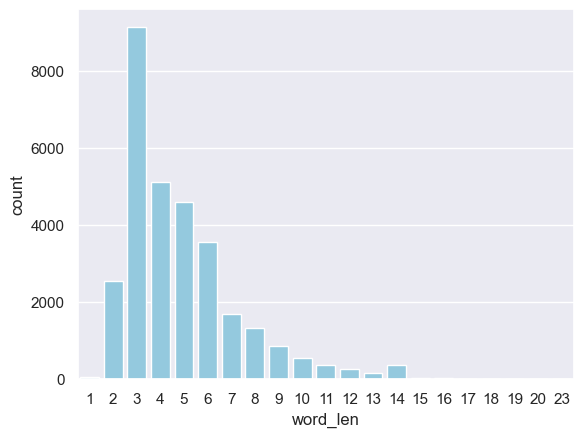

In [91]:
import seaborn as sns

sns.set_theme()
sns.barplot(y = len_counts, x = len_counts.index, color="skyblue")